# <p style="text-align:center">Support Vector Classification Hyper-Parameters Tuning</p>

## Libraries import

In [43]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.cross_validation import KFold
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.cross_validation import cross_val_score  
from sklearn.grid_search import GridSearchCV     #Hyper-parameters
import matplotlib.pyplot as plt
%matplotlib inline

#### File loading. We load the file (TrafficViolations.csv)

In [44]:
train = pd.read_csv('./dataset/TrafficViolations.csv')

In [45]:
null_data = train[train.isnull().any(axis=1)]
null_data.shape

(12, 18)

In [46]:
train.dropna(inplace=True)

In [47]:
train.shape

(28959, 18)

In [48]:
target = train['Damage.Class']
target.shape

(28959,)

## Target mapping to numeric

In [49]:
target_map = {'Class 1': 0, 'Class 2': 1, 'Class 3': 2}
target = target.map(target_map)

In [50]:
target.head()

0    0
1    2
2    0
3    1
4    2
Name: Damage.Class, dtype: int64

In [51]:
target.isnull().values.any()

False

In [52]:
train.columns

Index([u'Date Of Stop', u'Time Of Stop', u'Description', u'Belts',
       u'Personal Injury', u'Property Damage', u'Fatal', u'Commercial License',
       u'HAZMAT', u'Commercial Vehicle', u'Work Zone', u'VehicleType',
       u'Violation Type', u'Contributed To Accident', u'Race', u'Gender',
       u'Arrest Type', u'Damage.Class'],
      dtype='object')

### Selecting features

In [53]:
features = ['Time Of Stop', 'Belts', 'Personal Injury', 'Property Damage',
            'VehicleType'] #to be completed  arrest type, personal injury , property damage 
            #, contribute to accident                        
train = train[features]

## Function to convert feature values to numeric

In [54]:
#This function asumes the training set it is stored in variable named 'train'
for(train_name, train_series) in train.iteritems():
    if train_series.dtype == 'O':
        train[train_name], tmp_indexer = pd.factorize(train[train_name])
    else:
         #for int or float: fill NaN
        tmp_len = len(train[train_series.isnull()])
        if tmp_len>0:
            #print "mean", train_series.mean()
            train.loc[train_series.isnull(), train_name] = -999

In [55]:
## Train test split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(train, target, train_size=.15, random_state=0)

In [57]:
X_train.shape

(4343, 5)

In [58]:
y_train.shape

(4343,)

## Support Vector Machine (No Tuning)

In [66]:
clf = svm.SVC(decision_function_shape='ovo')

In [67]:
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [68]:
clf_train_predict = clf.predict(X_train)

In [69]:
clf_train_accuracy = accuracy_score(y_train, clf_train_predict)
clf_train_accuracy

0.46880036840893391

In [70]:
clf.fit(X_test, y_test)
clf_test_predict = clf.predict(X_test)
clf_test_accuracy = accuracy_score(y_test, clf_test_predict)
clf_test_accuracy

0.45047936301592462

### Support Vector Machine using Cross Validation

In [30]:

r_scores = cross_val_score(clf, train, target, cv=5, scoring='accuracy', n_jobs=-1)
# print r_scores
r_scores = round(r_scores.mean() * 100, 2)
print "Cross-Validation (kfold=10) - Accuracy: {}%".format(r_scores)

Cross-Validation (kfold=10) - Accuracy: 43.36%


## <p style="text-align:center;">Support Vector Machine Parameter tunning using GridSearchCV</p>

## C-Support Vector Classification

In [71]:
#Parameters
svm_svc_param_C = [0.1, 0.5, 1]
svm_svc_kernel = ['rbf', 'linear'] 
svm_svc_decision_function_shape = ['ovr', 'ovo']
svm_svc_gamma = [0.5, 1, 2]

svm_svc_param_grid = dict(C=svm_svc_param_C, gamma=svm_svc_gamma, decision_function_shape=svm_svc_decision_function_shape,
                         kernel=svm_svc_kernel)

svm_svc = svm.SVC()
svm_svc_grid = GridSearchCV(svm_svc, svm_svc_param_grid, cv=10, scoring='accuracy', n_jobs=-1)
svm_svc_grid.fit(X_train, y_train)
#svm_tuning.get_params()

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'kernel': ['rbf', 'linear'], 'C': [0.1, 0.5, 1], 'decision_function_shape': ['ovr', 'ovo'], 'gamma': [0.5, 1, 2]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [124]:
print svm_svc_grid.best_score_
print svm_svc_grid.best_params_
print svm_svc_grid.best_estimator_
svm_grid_mean_scores = [result.mean_validation_score for result in svm_svc_grid.grid_scores_]

0.466728068156
{'kernel': 'linear'}
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


### Parameter tuning for C

In [75]:
svm_svc = svm.SVC() # with default parameters

In [76]:
param_c = [0.1, 0.2, 0.3, 0.5, 1]
param_c_grid = dict(C=param_c)
svm_svc_grid = GridSearchCV(svm_svc, param_c_grid, cv=10, scoring='accuracy', n_jobs=-1)
svm_svc_grid.fit(X_train, y_train)
param_c_mean_scores = [result.mean_validation_score for result in svm_svc_grid.grid_scores_]

### Plot of SVM cost - Accuracy

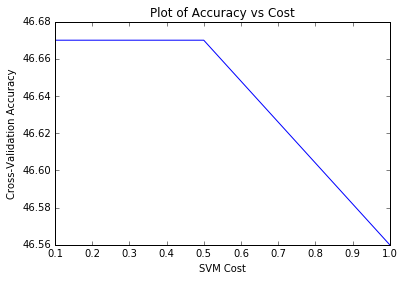

In [123]:
c_accuracy = np.around(np.array(param_c_mean_scores) * 100, decimals=2)
plt.plot(param_c, c_accuracy)
plt.title('Plot of Accuracy vs Cost')
plt.xlabel('SVM Cost')
plt.ylabel('Cross-Validation Accuracy')

In [83]:
param_kernel = ['rbf', 'linear']
param_c_grid = dict(kernel=param_kernel)
svm_svc_grid = GridSearchCV(svm_svc, param_c_grid, cv=10, scoring='accuracy', n_jobs=-1)
svm_svc_grid.fit(X_train, y_train)
param_kernel_mean_scores = [result.mean_validation_score for result in svm_svc_grid.grid_scores_]

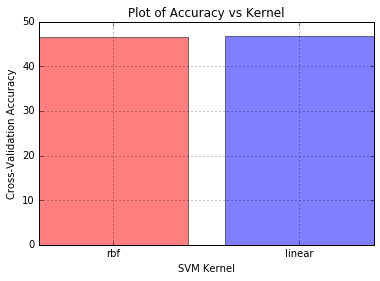

In [122]:
objects = ('rbf','linear')
kernel_label = np.arange(len(objects))
kernel_accuracy = np.around(np.array(param_kernel_mean_scores) * 100, decimals=2)
plt.bar(kernel_label, kernel_accuracy, align='center', alpha=0.5, color=['red', 'blue'])
plt.xticks(kernel_label, objects)
plt.grid(True)
plt.title('Plot of Accuracy vs Kernel')
plt.xlabel('SVM Kernel')
plt.ylabel('Cross-Validation Accuracy')

In [151]:
for label, accuracy in zip (objects, kernel_accuracy):
    print "Kernel ({}) : Accuracy {}%".format(label, accuracy)

Kernel (ovr) : Accuracy 46.56%
Kernel (ovo) : Accuracy 46.67%


### Plot of Accuracy vs Decision Function

In [142]:
param_decision_function_shape = ['ovr', 'ovo']
param_decision_function_grid = dict(decision_function_shape=param_decision_function_shape)
svm_svc_grid = GridSearchCV(svm_svc, param_decision_function_grid, cv=10, scoring='accuracy', n_jobs=-1)
svm_svc_grid.fit(X_train, y_train)
param_decision_function_mean_scores = [result.mean_validation_score for result in svm_svc_grid.grid_scores_]

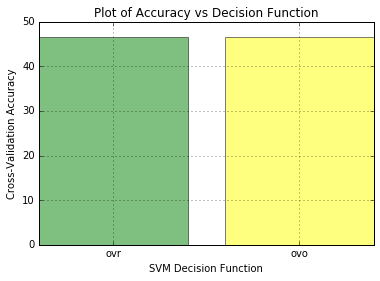

In [143]:
objects = ('ovr','ovo')
decision_function_label = np.arange(len(objects))
decision_function_accuracy = np.around(np.array(param_decision_function_mean_scores) * 100, decimals=2)
plt.bar(decision_function_label, decision_function_accuracy, align='center', alpha=0.5, color=['green', 'yellow'])
plt.xticks(kernel_label, objects)
plt.grid(True)
plt.title('Plot of Accuracy vs Decision Function')
plt.xlabel('SVM Decision Function')
plt.ylabel('Cross-Validation Accuracy')

### Plot of Accuracy vs Gamma

In [129]:
param_gamma = [0.1, 0.2, 0.3, 0.5, 1, 2]
param_gamma_grid = dict(gamma=param_gamma)
svm_svc_grid = GridSearchCV(svm_svc, param_gamma_grid, cv=10, scoring='accuracy', n_jobs=-1)
svm_svc_grid.fit(X_train, y_train)
param_c_mean_scores = [result.mean_validation_score for result in svm_svc_grid.grid_scores_]

In [131]:
param_c_mean_scores

[0.46672806815565276,
 0.46557679023716325,
 0.46120193414690308,
 0.45982040064471563,
 0.45452452221966383,
 0.45245222196638268]

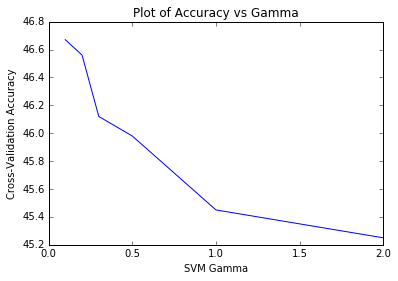

In [130]:
gamma_accuracy = np.around(np.array(param_c_mean_scores) * 100, decimals=2)
plt.plot(param_gamma, gamma_accuracy)
plt.title('Plot of Accuracy vs Gamma')
plt.xlabel('SVM Gamma')
plt.ylabel('Cross-Validation Accuracy')

## Support Vector with Tuned Hyper Parameters 

In [132]:
tuned_clf = svm.SVC(kernel='linear', decision_function_shape='ovr', gamma=0.1, C=0.5)
r_scores = cross_val_score(tuned_clf, train, target, cv=10, scoring='accuracy', n_jobs=-1)
# print r_scores
r_scores = round(r_scores.mean() * 100, 2)
print "Cross-Validation (kfold=10) - Accuracy: {}%".format(r_scores)

Cross-Validation (kfold=10) - Accuracy: 45.14%
